In [ ]:
%cd /content/drive/MyDrive/Business Analyst. C/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst. C/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [ ]:
df["Sex"] = np.where(df["Sex"] == "male",1,0)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


<ipython-input-34-41f62545c6f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(),


<Axes: >

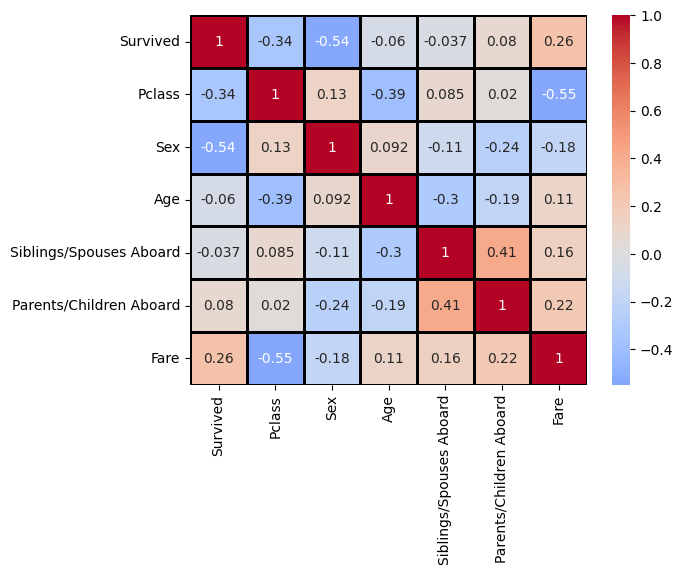

In [ ]:
# correlation matrix
sns.heatmap(data = df.corr(),
            cmap = "coolwarm",
            fmt = ".2g",
            annot = True,
            linewidths = 1,
            linecolor = "black",
            center = 0)
# we cannot use correlation for the binary variables, for that we use chi2


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Siblings/Spouses Aboard'}>,
        <Axes: title={'center': 'Parents/Children Aboard'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

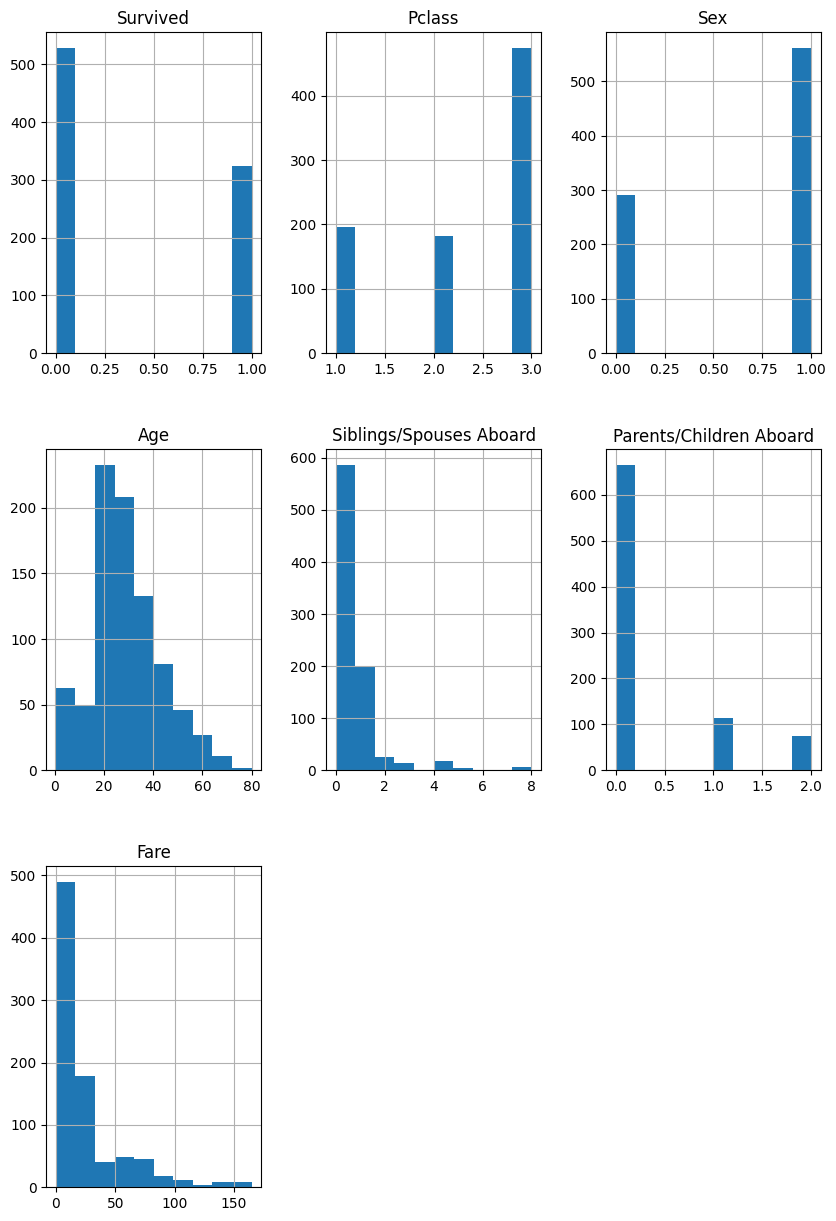

In [ ]:
df.hist(figsize = (10,15))


In [ ]:
print(len(df))


887


In [ ]:
df = df[df["Fare"] < 200]
df = df[df["Parents/Children Aboard"] < 3]
print(len(df))

853


In [ ]:
y = df["Survived"]
x = df.drop(columns = ["Survived",	"Pclass",	"Name","Sex","Age","Siblings/Spouses Aboard"])
x = sm.add_constant(x)
print(x)
y

     const  Parents/Children Aboard     Fare
0      1.0                        0   7.2500
1      1.0                        0  71.2833
2      1.0                        0   7.9250
3      1.0                        0  53.1000
4      1.0                        0   8.0500
..     ...                      ...      ...
882    1.0                        0  13.0000
883    1.0                        0  30.0000
884    1.0                        2  23.4500
885    1.0                        0  30.0000
886    1.0                        0   7.7500

[853 rows x 3 columns]


0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 853, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,
                                                 test_size = 0.2,
                                                 random_state= 1502)

In [ ]:
model_titanic = sm.Logit(y_train,X_train).fit()
print(model_titanic.summary())

Optimization terminated successfully.
         Current function value: 0.620760
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  682
Model:                          Logit   Df Residuals:                      679
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Aug 2023   Pseudo R-squ.:                 0.06898
Time:                        16:48:50   Log-Likelihood:                -423.36
converged:                       True   LL-Null:                       -454.73
Covariance Type:            nonrobust   LLR p-value:                 2.383e-14
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.1061      0.120     -9.237      0.000      -1.341   

In [ ]:
# you have to define a function
def logistic_reader(coffecient):
  probablity = round((np.exp(coffecient)-1)*100,1)
  if probablity > 0:
    print("The likely hood increases by",probablity,"%")
  elif probablity == 0:
    print("No impact")
  else:
    print("The likelyhood decreses by",probablity,"%")

In [ ]:
logistic_reader(0.0210)
logistic_reader(0.2114)

The likely hood increases by 2.1 %
The likely hood increases by 23.5 %


In [ ]:
# assesing the accuracy
predictions = model_titanic.predict(X_test)
predictions[:5]

324    0.273815
42     0.546976
323    0.850425
334    0.572090
682    0.546976
dtype: float64

In [ ]:
predictions = np.where(predictions > 0.5,1,0)
predictions

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [ ]:

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
print(tn, fp, fn, tp)

100 10 44 17


In [ ]:
prediction_mean = predictions.mean()
if prediction_mean >= 0.3:
  print(" This is a distributed data set")
else:
  print(" This is not a distributed data set")


 This is not a distributed data set


In [ ]:
# assesments
Accuracy = (((tn + tp) / (tn+tp+fn+fp))*100) # first is TP tp ie tap water.
print("Accuracy:",Accuracy,"%")

f1 = (((2*tp) / (2*tp+fn+fp))*100)
print("F-1_score:",f1,"%")

specificity = (((tn) / (tn+fp))*100)
print("specificity:",specificity,"%")

sensitivity = (((tp) / (tp+fn))*100)
print("sensitivity:",sensitivity,"%")

Accuracy: 68.42105263157895 %
F-1_score: 38.63636363636363 %
specificity: 90.9090909090909 %
sensitivity: 27.86885245901639 %


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79       110
           1       0.63      0.28      0.39        61

    accuracy                           0.68       171
   macro avg       0.66      0.59      0.59       171
weighted avg       0.67      0.68      0.64       171

